In [1]:
import pandas as pd

In [2]:
DiamondPricesData=pd.read_csv('F:\IVY PRO\Python\Python Datasets\Regression Datasets\DiamondPricesData.csv')

<font color=red><b>Problem Statement</b> </font>
* What is the expected market vaue of diamond?

In [3]:
print("Shape of DiamondPricesData = ",DiamondPricesData.shape)
#Drop duplicates
DiamondPricesData=DiamondPricesData.drop_duplicates()
print("Shape of DiamondPricesData after deleting duplicates = ",DiamondPricesData.shape)

Shape of DiamondPricesData =  (53940, 10)
Shape of DiamondPricesData after deleting duplicates =  (53794, 10)


In [4]:
DiamondPricesData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [5]:
#information about Null values
DiamondPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
#statistical information
DiamondPricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


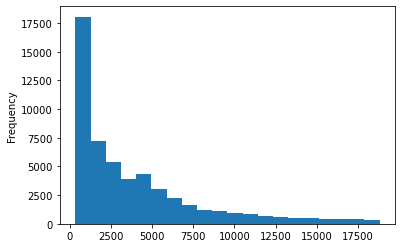

In [7]:
#Shape of target variable distribution
DiamondPricesData['price'].plot(kind='hist',bins=20)

<font color=red>Target variable is highly positively skewed curve. So, we treat the data to make it useful for predictive modelling</font>

In [8]:
DiamondPricesData.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

<font color=red><b>Continuous Variables</b></font>

* carat
* depth
* table
* x
* y
* z

### <font color=red>Working on Contiuous Variables</font>

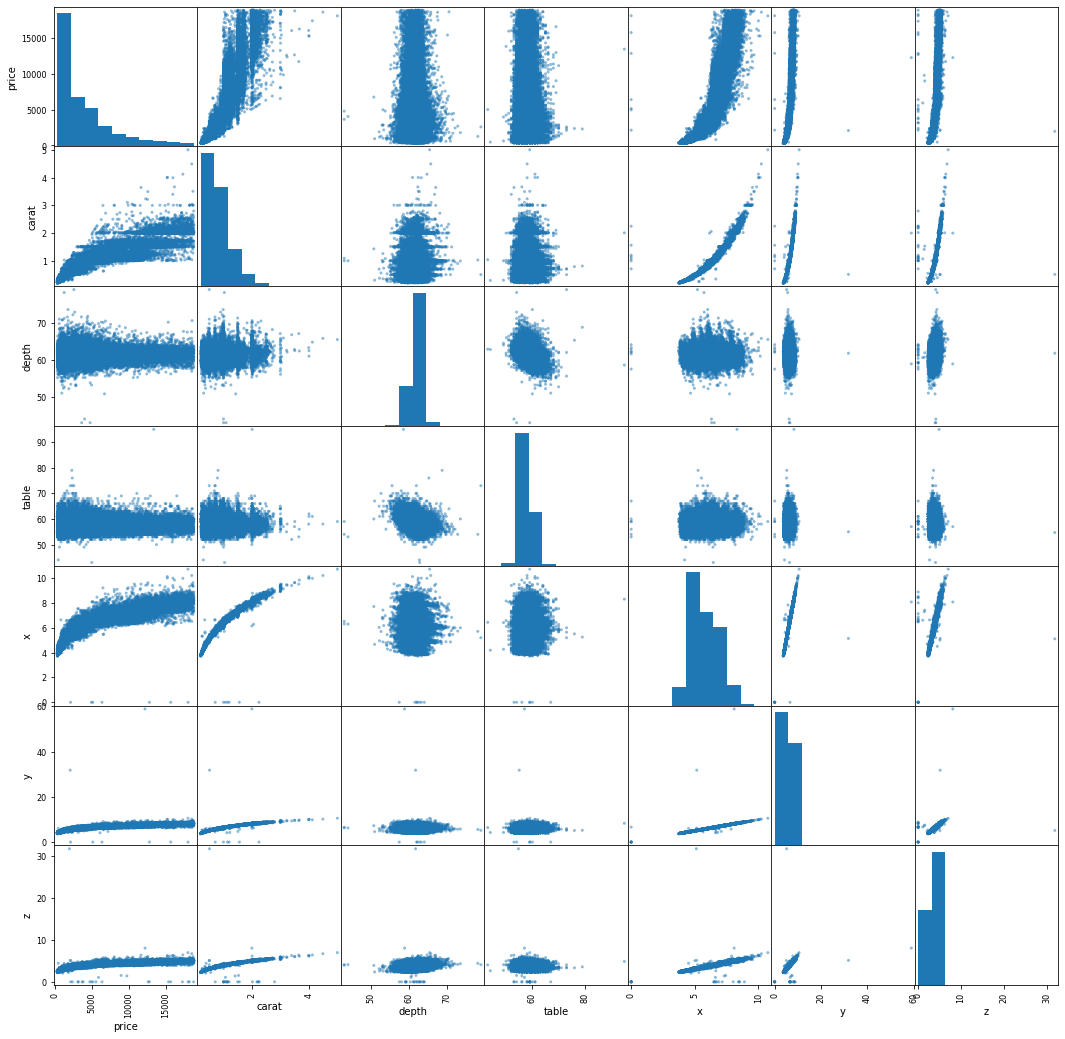

In [9]:
FullDataPlot=pd.plotting.scatter_matrix(DiamondPricesData,figsize=(18,18))

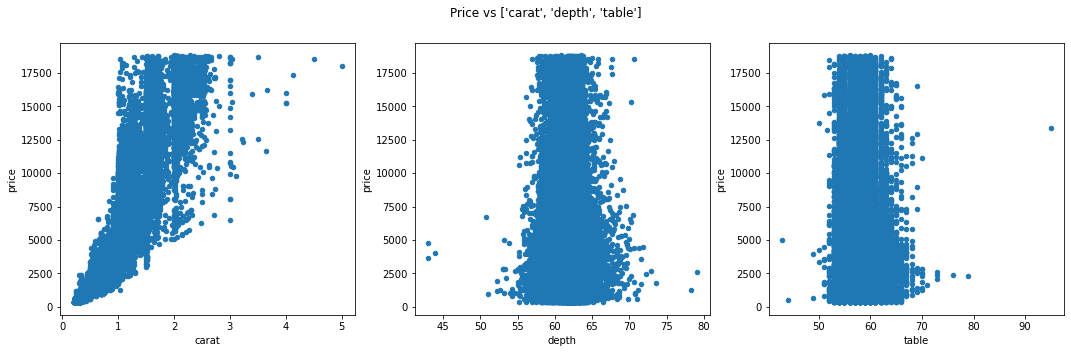

In [9]:
def ScatterPlots(inpData,colstoPlot):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    fig.suptitle('Price vs '+str(colstoPlot))
    
    for colName,plotNumber in zip(colstoPlot,range(len(colstoPlot))):
        inpData.plot.scatter(x=colName,y='price',ax=subPlot[plotNumber])
ScatterPlots(DiamondPricesData,['carat','depth','table'])

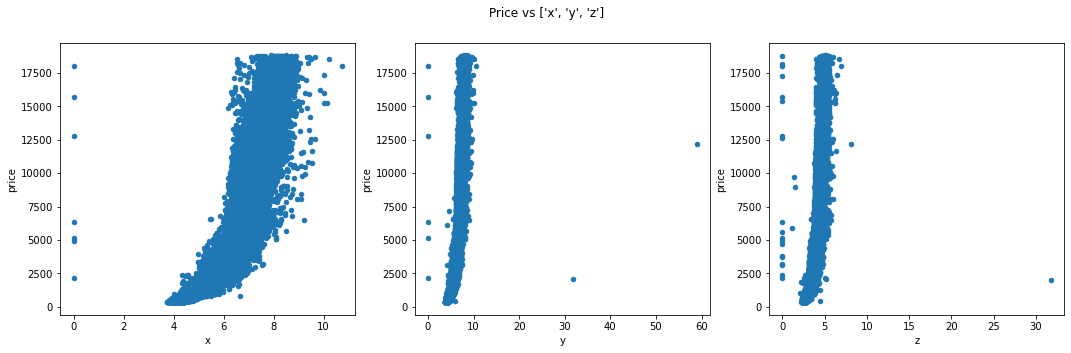

In [10]:
ScatterPlots(DiamondPricesData,['x','y','z'])

In [11]:
#Treating outliers
DiamondPricesData['z'][DiamondPricesData['z']>30]=5
DiamondPricesData['y'][DiamondPricesData['y']>50]=10
DiamondPricesData['y'][DiamondPricesData['y']>30]=9

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


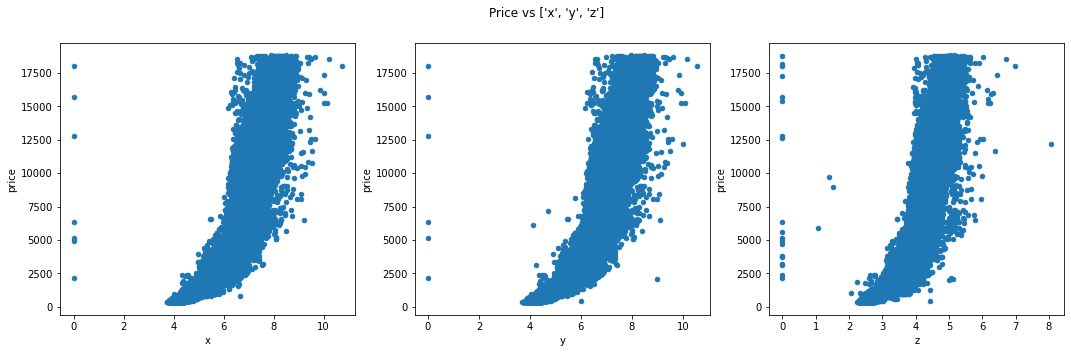

In [12]:
ScatterPlots(DiamondPricesData,['x','y','z'])

In [13]:
DiamondPricesData['price'].describe()

count    53794.000000
mean      3933.065082
std       3988.114460
min        326.000000
25%        951.000000
50%       2401.000000
75%       5326.750000
max      18823.000000
Name: price, dtype: float64

In [14]:
CorrelationData=DiamondPricesData.corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921548,-0.011047,0.126566,0.884504,0.886187,0.874683
carat,0.921548,1.000000,0.027885,0.181091,0.975380,0.974605,0.968507
depth,-0.011047,0.027885,1.000000,-0.297625,-0.025303,-0.028487,0.096221
table,0.126566,0.181091,-0.297625,1.000000,0.194855,0.188542,0.153446
x,0.884504,0.975380,-0.025303,0.194855,1.000000,0.998195,0.985867
y,0.886187,0.974605,-0.028487,0.188542,0.998195,1.000000,0.985448
z,0.874683,0.968507,0.096221,0.153446,0.985867,0.985448,1.000000


In [15]:
CorrelationData['price'][abs(CorrelationData['price'])>0.5]

price    1.000000
carat    0.921548
x        0.884504
y        0.886187
z        0.874683
Name: price, dtype: float64

<font color=red>So, we conclude that carat, x, y and z are correlated to price</font>

<font color=red><b>Categorical Variables</b></font>
* cut
* color
* clarity

In [16]:
def PlotBarCharts(inpData,colstoPlot):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    fig.suptitle('price vs '+str(colstoPlot))
    for colName,plotNumber in zip(colstoPlot,range(len(colstoPlot))):
        inpData.groupby(colName).mean()['price'].plot(kind='bar',ax=subPlot[plotNumber])

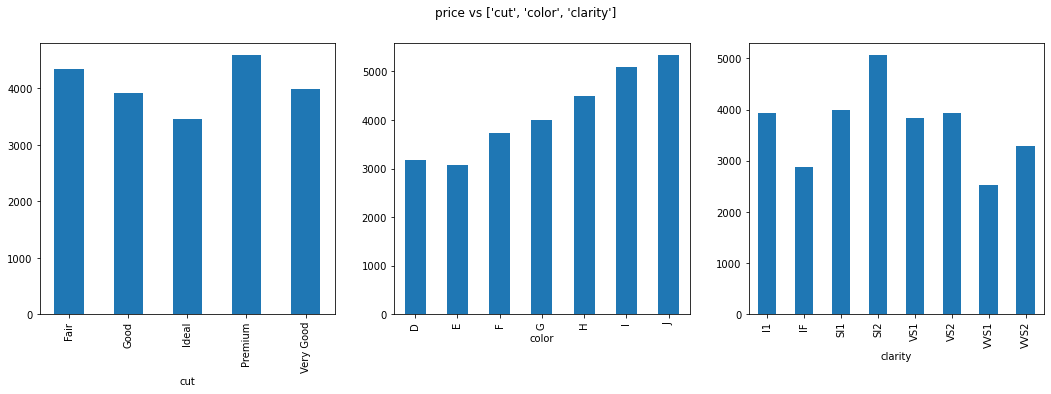

In [17]:
PlotBarCharts(DiamondPricesData,['cut','color','clarity'])

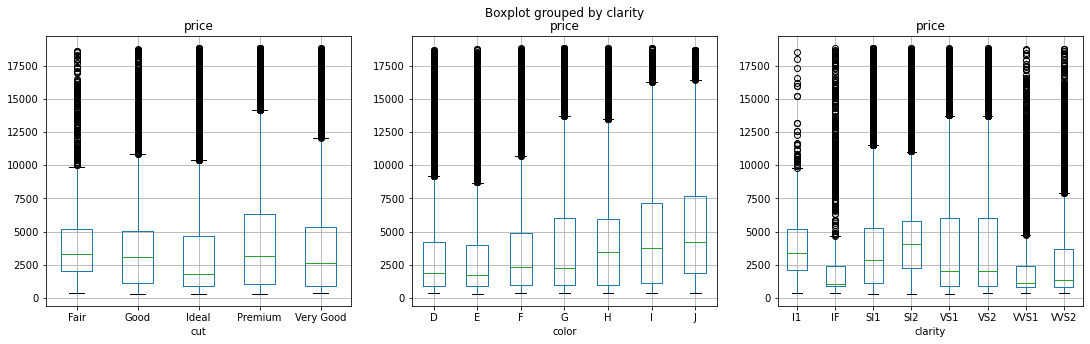

In [18]:
def PlotBoxPlot(inpData,colstoPlot):
    import matplotlib.pyplot as plt
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colstoPlot),figsize=(18,5))
    fig.suptitle('BoxPlot of price vs'+str(colstoPlot))
    for colName,plotNumber in zip(colstoPlot,range(len(colstoPlot))):
        inpData.boxplot(column='price',by=colName,ax=subPlot[plotNumber])
PlotBoxPlot(DiamondPricesData,['cut','color','clarity'])

In [19]:
from termcolor import colored

In [20]:
from scipy.stats import f_oneway


# Assumption(H0) is that Predictorvariable and Prices are NOT correlated
def FunctionAnova(inpData,targetVariable,categoricalPredictors):
    for categoricalPredictor in categoricalPredictors:
        CategoryGroupList=inpData.groupby(categoricalPredictor)[targetVariable].apply(list)
        AnovaResults=f_oneway(*CategoryGroupList)
        print('P-Value for Anova test for',categoricalPredictor ,'is: ', AnovaResults[1])
        # We accept the Assumption(H0) only when P-Value > 0.05
        if(AnovaResults[1]<0.05):
            print(colored(categoricalPredictor,'red'),colored(' is correlated to price','red'))


In [21]:
FunctionAnova(DiamondPricesData,'price',['cut','color','clarity'])

P-Value for Anova test for cut is:  1.800084700570961e-147
cut  is correlated to price
P-Value for Anova test for color is:  0.0
color  is correlated to price
P-Value for Anova test for clarity is:  8.6796082976e-313
clarity  is correlated to price


<font color=red>So, We conclude cut, color and clarity are correlated with price.</font>

<font color='red'>Now, we have got our useful variables for predictive modelling of data and, they are</font>
* carat
* x
* y
* z
* cut
* color
* clarity

# <font color='red'>Data pre processing for ML</font>

In [22]:
DiamondPricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [23]:
print('Before Deleting missing values:', DiamondPricesData.shape)
DiamondPricesDataCleaned=DiamondPricesData.dropna()
print('After Deleting missing values:', DiamondPricesDataCleaned.shape)

Before Deleting missing values: (53794, 10)
After Deleting missing values: (53774, 10)


# <font color='red'>Treating Missing values</font>

Numerical Null variables are <font color='red'>depth</font>

Categorical Null variables are <font color='red'>color</font>

<font color='red'>Linear Interpolation for numeric variable</font>

In [24]:
DiamondPricesData['depth']=DiamondPricesData['depth'].interpolate(method='linear')

In [25]:
DiamondPricesData.isnull().sum()

price      0
carat      0
cut        0
color      6
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

<font color='red'>Filling categorical NA's with mode value</font>

In [26]:
Mode_color=DiamondPricesData['color'].mode()[0]
DiamondPricesData['color']=DiamondPricesData['color'].fillna(value=Mode_color)

In [27]:
DiamondPricesData.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

<font color='red'>Now, we can see there are no null values in data</font>

# <font color='red'>Treating Outliers</font>

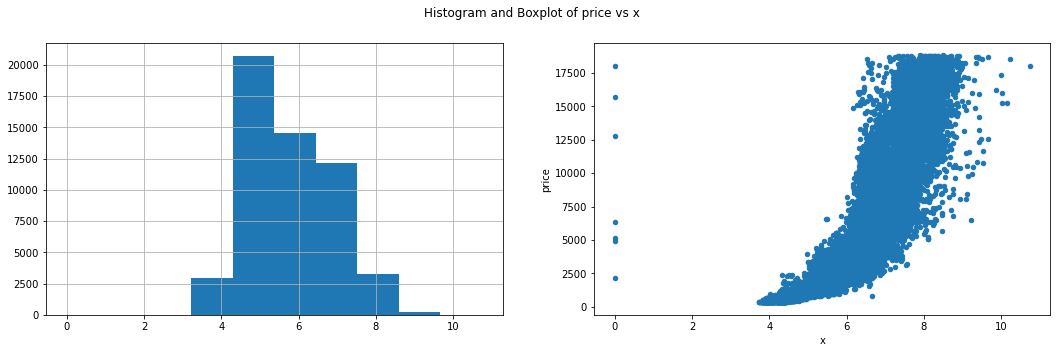

In [28]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs x')
DiamondPricesData['x'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='x',y='price',ax=subPlot[1])

In [29]:
Filter1=DiamondPricesData['x']<2
Filter2=DiamondPricesData['price']>10000
Filter3=DiamondPricesData['price']<10000
DiamondPricesData['x'][Filter1 & Filter2]=6
DiamondPricesData['x'][Filter1 & Filter3]=5

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


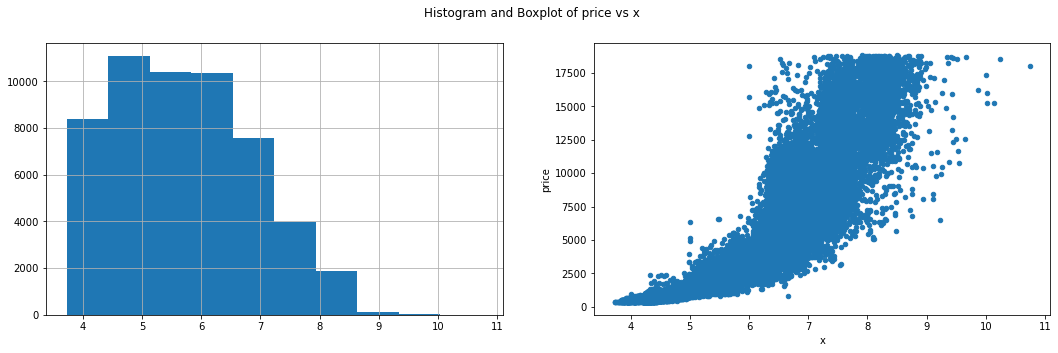

In [30]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs x')
DiamondPricesData['x'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='x',y='price',ax=subPlot[1])

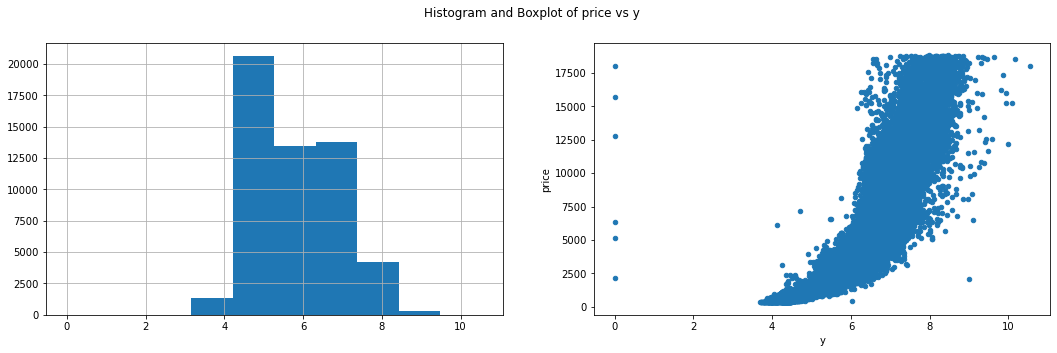

In [31]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs y')
DiamondPricesData['y'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='y',y='price',ax=subPlot[1])

In [32]:
Filter1=DiamondPricesData['y']<2
Filter2=DiamondPricesData['price']>10000
Filter3=DiamondPricesData['price']<10000
DiamondPricesData['y'][Filter1 & Filter2]=6
DiamondPricesData['y'][Filter1 & Filter3]=5

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


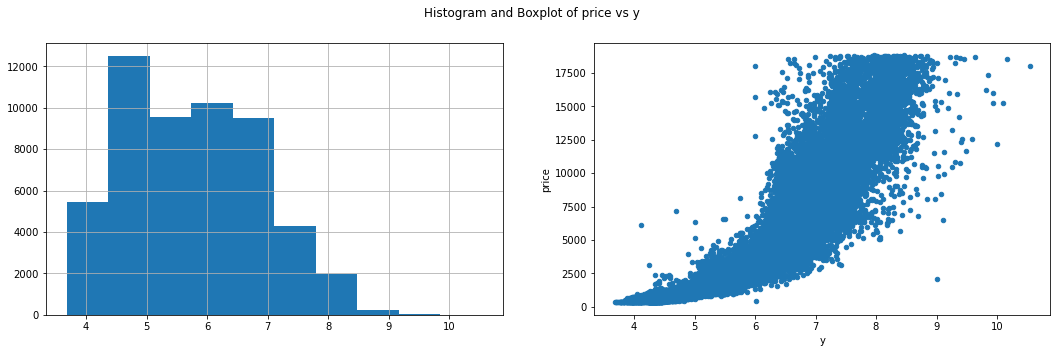

In [33]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs y')
DiamondPricesData['y'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='y',y='price',ax=subPlot[1])

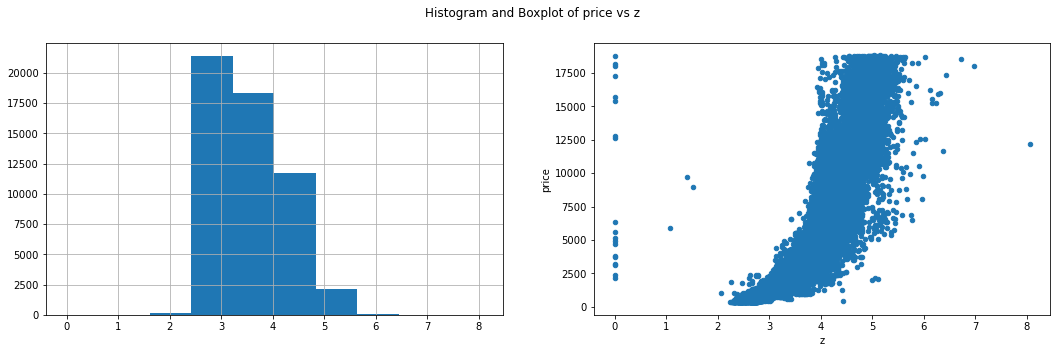

In [34]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs z')
DiamondPricesData['z'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='z',y='price',ax=subPlot[1])

In [35]:
Filter1=DiamondPricesData['z']<2
Filter2=DiamondPricesData['z']>8
Filter5=DiamondPricesData['price']>4000
Filter6=DiamondPricesData['price']<4000
DiamondPricesData['z'][Filter1 & Filter6]=3
DiamondPricesData['z'][Filter1 & Filter5]=4
DiamondPricesData['z'][Filter2]=6

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


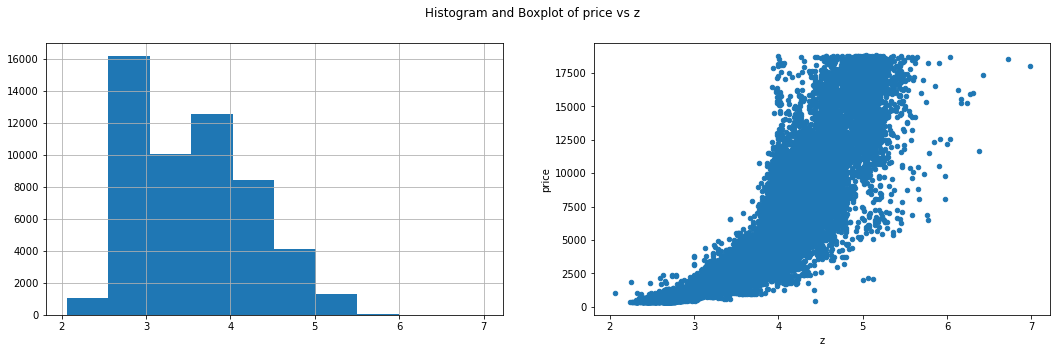

In [36]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs z')
DiamondPricesData['z'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='z',y='price',ax=subPlot[1])

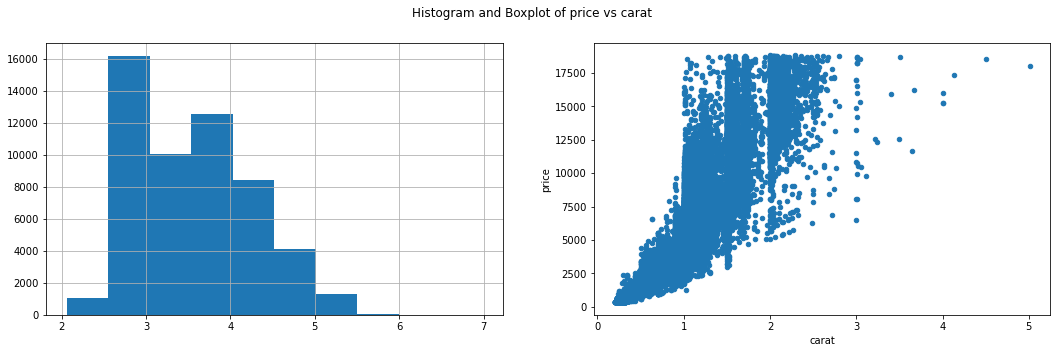

In [37]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs carat')
DiamondPricesData['z'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='carat',y='price',ax=subPlot[1])

In [38]:
DiamondPricesData['carat'][DiamondPricesData['carat']>3.5]=3.5

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


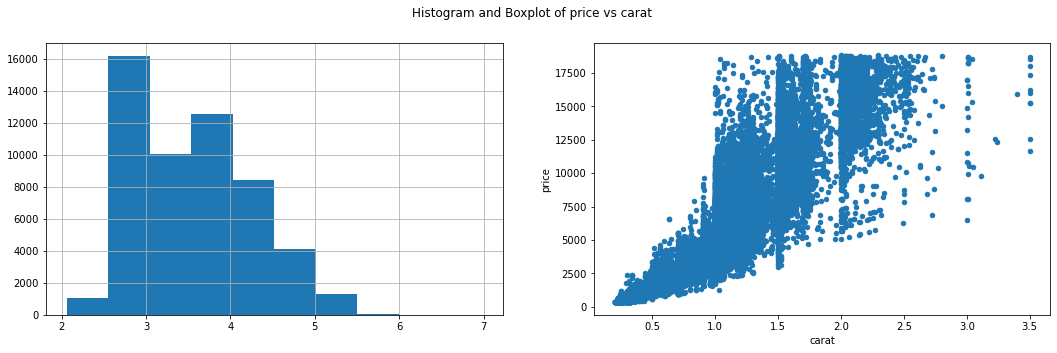

In [39]:
import matplotlib.pyplot as plt

fig,subPlot=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
fig.suptitle('Histogram and Boxplot of price vs carat')
DiamondPricesData['z'].hist(ax=subPlot[0])
DiamondPricesData.plot.scatter(x='carat',y='price',ax=subPlot[1])

<font color='red'>We convert categorical data to numeric data with the help of dummy variables</font>

In [40]:
DiamondPricesData['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [41]:
DiamondPricesData['cut'].replace({'Ideal':4, 'Premium':5, 'Good':2, 'Very Good':3, 'Fair':1},inplace=True)

In [42]:
DiamondPricesData['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [43]:
DiamondPricesData['color'].replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1},inplace=True)

In [44]:
DiamondPricesData['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [45]:
DiamondPricesData['clarity'].replace({'SI2':4, 'SI1':3, 'VS1':5, 'VS2':6, 'VVS2':8, 'VVS1':7, 'I1':1, 'IF':2},inplace=True)

In [46]:
DiamondPricesDataNumeric=pd.get_dummies(DiamondPricesData)
DiamondPricesDataNumeric

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,4,2,4,61.5,55.0,3.95,3.98,2.43
1,326,0.21,5,2,3,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31
3,334,0.29,5,6,6,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,4,1,3,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,3,1,3,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,5,5,4,61.0,58.0,6.15,6.12,3.74


In [47]:
DiamondPricesDataNumeric.nunique()

price      11602
carat        265
cut            5
color          7
clarity        8
depth        189
table        127
x            553
y            551
z            370
dtype: int64

In [48]:
#DiamondPricesDataNumeric.to_pickle('F:\IVY PRO\Python\Assignments\EDA2\PKL files\DiamondPricesDataNumeric.pkl')

### This is our final processed data

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [49]:
TargetVariable='price'
Predictors=['carat']
X=DiamondPricesDataNumeric[Predictors].values
y=DiamondPricesDataNumeric[TargetVariable].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=55)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40345, 1)
(40345,)
(13449, 1)
(13449,)


In [52]:
X_train[:5]

array([[0.3 ],
       [1.22],
       [0.9 ],
       [1.61],
       [0.38]])

# Machine Learning: Fitting Multiple algorithms on data
We create multiple models by using multiple algorithms and select that models which gives the best accuracy


## Simple Linear Regression
When only one predictor is used

In [53]:
from sklearn.linear_model import LinearRegression
RegModel=LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train, y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
print('R2 value :',metrics.r2_score(y_train, LREG.predict(X_train)))
import numpy as np
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))



TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

TestingDataResults['APE']=100 * ((abs(y_test-np.round(prediction)))/y_test)

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])


Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)

TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 value : 0.8494446693713475
Accuracy on Test Data: 62.12710602453282
Mean Accuracy: 62.12821404726301
Median Accuracy: 72.06645898234683


,carat,price,Predictedprice,APE
0,1.53,9572,9621.0,0.511910
1,2.07,13675,13813.0,1.009141
2,0.38,525,694.0,32.190476
3,0.90,4547,4731.0,4.046624
4,1.01,5759,5584.0,3.038722


In [55]:
print('The value of coefficient is ',LREG.coef_)
print('The value of intercept is ',LREG.intercept_)

The value of coefficient is  [7778.99486215]
The value of intercept is  -2264.202277278325


### Using above slope and intercept, Equation of our Simple Linear regression model becomes
<b> Price = 7739.052* Age -2243.2146 </b>

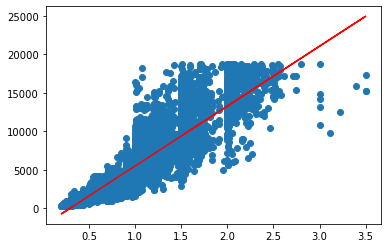

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['carat'] , y=TestingDataResults['price'])
plt.plot(TestingDataResults['carat'] , TestingDataResults['Predictedprice'], color='red')

### Sampling with multiple Predictor columns for all other algorithms

In [57]:
DiamondPricesDataNumeric.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [119]:
TargetVariable='price'
Predictors=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']

X=DiamondPricesDataNumeric[Predictors].values
y=DiamondPricesDataNumeric[TargetVariable].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43035, 9)
(43035,)
(10759, 9)
(10759,)


## Multiple Linear Regression
When multiple predictors are used

In [120]:
from sklearn.linear_model import LinearRegression
RegModel=LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics

print('R2 value : ',metrics.r2_score(y_train,LREG.predict(X_train)))

print('Accuracy on Test Data : ',100 - (np.mean(np.abs((y_test-prediction)/y_test))*100))

TestingDataResults=pd.DataFrame(data=X_test,columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+TargetVariable]=np.round(prediction)
TestingDataResults['APE']=100 * ((abs(y_test-np.round(prediction)))/y_test)

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])


Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy:', Accuracy)
print('Median Accuracy:', MedianAccuracy)
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 value :  0.890373736881529
Accuracy on Test Data :  63.378870331549095
Mean Accuracy: 63.378662317092
Median Accuracy: 77.65273311897107


,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,1687.0,17.560976
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,4729.0,31.947545
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1992.0,7.617504
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,2225.0,39.937107
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,6017.0,5.746924


In [166]:
np.set_printoptions(suppress=True)
print('The value of slope is : ',LREG.coef_)
print('The value of intercept is : ',LREG.intercept_)

The value of slope is :  [11625.92086327   142.18642927  -270.62350886   275.55903356
    83.74122833   -69.04042754 -2718.88072707  3554.74402672
 -3611.45216467]
The value of intercept is :  548.0033373380284


In [167]:
TestingDataResults.sort_values(by='APE',ascending=False).head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
3025,0.31,2.0,7.0,4.0,63.3,58.0,4.34,4.35,2.75,335,-1328.0,496.417910
9454,0.30,2.0,7.0,3.0,63.8,56.0,4.26,4.23,2.71,450,-1604.0,456.444444
9053,0.23,3.0,5.0,2.0,63.9,55.0,3.89,3.90,2.49,369,-1305.0,453.658537
15444,0.30,3.0,6.0,3.0,61.6,62.0,4.27,4.30,2.64,394,-1315.0,433.756345
2968,0.30,2.0,6.0,3.0,63.3,59.0,4.22,4.25,2.68,394,-1294.0,428.426396
11381,0.30,3.0,6.0,3.0,61.9,61.0,4.27,4.29,2.65,394,-1293.0,428.172589
11607,0.30,3.0,7.0,3.0,63.4,54.0,4.29,4.23,2.70,450,-1403.0,411.777778
10876,0.26,3.0,6.0,3.0,59.2,60.0,4.20,4.24,2.50,445,-1361.0,405.842697
12303,0.23,4.0,7.0,5.0,62.8,56.0,3.93,3.90,2.46,340,-1039.0,405.588235
5702,0.30,2.0,6.0,3.0,64.1,57.0,4.30,4.25,2.74,506,-1523.0,400.988142


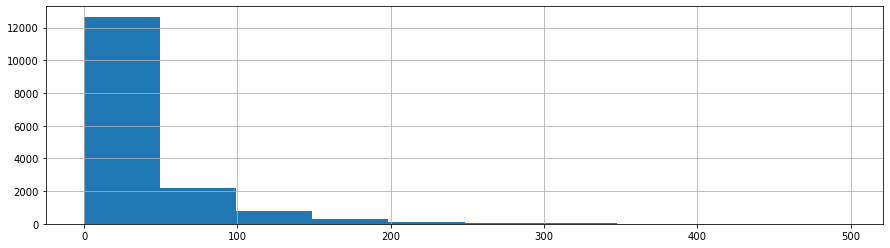

In [168]:
TestingDataResults['APE'].hist(figsize=(15,4))

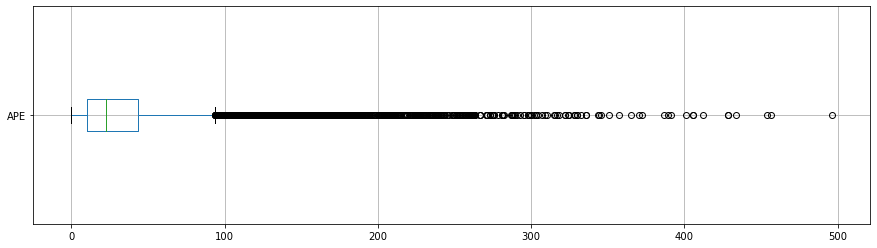

In [169]:
TestingDataResults.boxplot(column='APE',figsize=(15,4),vert=False)

# Decision Trees

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.9958719134866065
Accuracy 91.60960052562399
Mean Accuracy :  91.60982021357792
Median Accuracy :  94.46349828515433


,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,1826.0,27.247387
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,3745.0,4.492188
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1910.0,3.187466
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,1599.0,0.566038
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,5277.0,7.258348


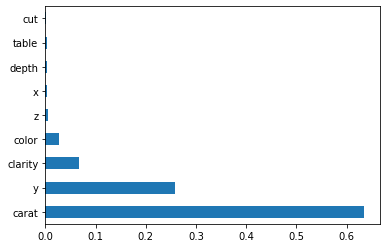

In [125]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=16,criterion='mse')

print(RegModel)

DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

In [171]:
print(np.var(y_train))
print(np.mean(y_train))

16137818.651381793
3954.741601380959


In [172]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\lenovo\\anaconda3\\Library\\bin\\graphviz'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.219773 to fit



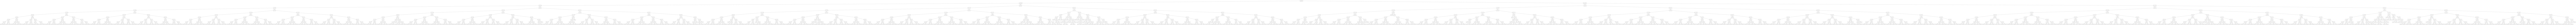

In [173]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=TargetVariable)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

#### Random Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2 Value: 0.9967977914357999
Accuracy 93.37040112283994
Mean Accuracy :  93.3700709808539
Median Accuracy :  95.4639175257732


,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,1828.0,27.386760
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,3731.0,4.101562
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1867.0,0.864398
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,1634.0,2.767296
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,5339.0,6.168717


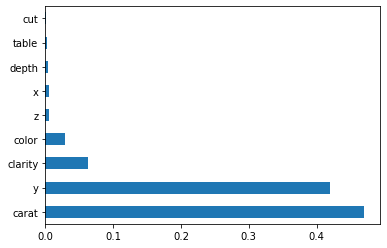

In [129]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=19, n_estimators=100,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

print(RegModel)

RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

In [90]:
DiamondPricesDataNumeric.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

### Plotting a single Decision tree out of Random Forest

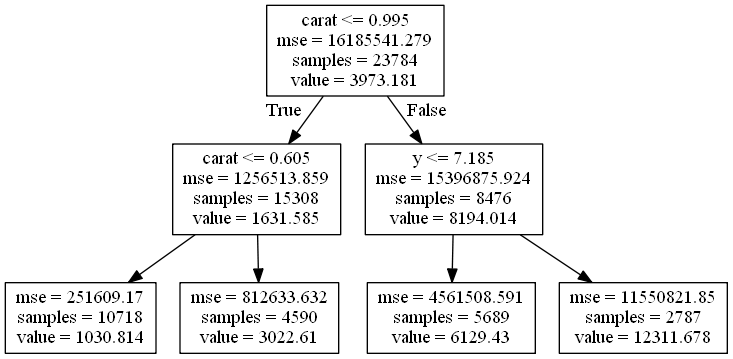

In [175]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[20] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

#### ADA Boost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=19,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,1826.0,27.247387
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,3740.0,4.352679
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1868.0,0.918422
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,1656.0,4.150943
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,5261.0,7.539543


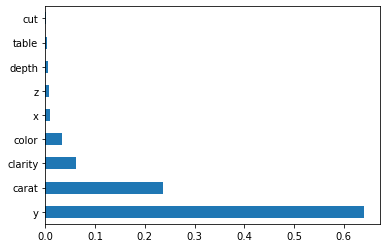

In [134]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=19)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.1)

print(RegModel)

AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

### Plotting a single Decision tree out of Adaboost

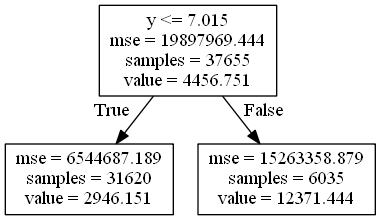

In [177]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[8] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

#### XG Boost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
R2 Value: 0.9993979437168682
Accuracy 93.73467488936228
Mean Accuracy :  93.73499229720399
Median Accuracy :  95.61527581329561


,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,1760.0,22.648084
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,3686.0,2.845982
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1897.0,2.485143
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,1635.0,2.830189
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,5451.0,4.200351


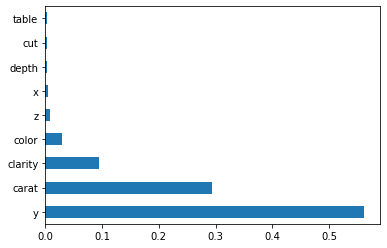

In [139]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')

print(RegModel)

XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

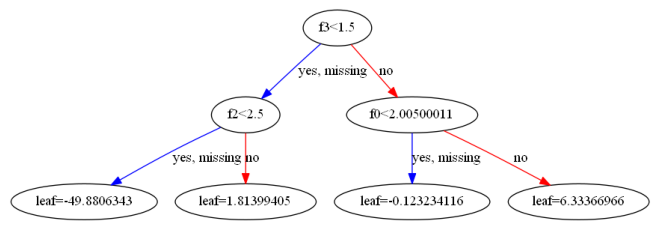

In [179]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 4))
plot_tree(XGB, num_trees=500, ax=ax)

#### KNN

In [144]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=6)

print(RegModel)

KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
R2 Value: 0.9628062240230473
Accuracy 86.19514059659716
Mean Accuracy :  86.19519074732267
Median Accuracy :  89.6875


,carat,cut,color,clarity,depth,table,x,y,z,price,Predictedprice,APE
0,0.71,1.0,7.0,6.0,64.9,54.0,5.63,5.53,3.62,1435,2351.0,63.832753
1,0.90,3.0,2.0,4.0,61.0,59.0,6.14,6.18,3.76,3584,4035.0,12.583705
2,0.57,4.0,4.0,5.0,62.1,56.0,5.30,5.33,3.30,1851,1850.0,0.054025
3,0.51,5.0,2.0,6.0,62.5,60.0,5.08,5.10,3.18,1590,1716.0,7.924528
4,1.19,4.0,6.0,3.0,62.3,55.0,6.80,6.82,4.24,5690,5395.0,5.184534


#### SVM

In [ ]:
from sklearn import svm
RegModel = svm.SVR(C=5000, kernel='rbf', degree=20, gamma=0.01)

print(RegModel)

SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults['APE']=abs((y_test-np.round(prediction))/y_test)*100
                                
MAPE=np.mean(TestingDataResults['APE'])      
MedianAPE=np.median(TestingDataResults['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy : ',Accuracy)
print('Median Accuracy : ',MedianAccuracy)

TestingDataResults.head()

SVR(C=5000, cache_size=200, coef0=0.0, degree=20, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
